<a href="https://colab.research.google.com/github/duaneywadey/colab/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
calories = pd.read_csv('/content/drive/MyDrive/calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/drive/MyDrive/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# Combining the dataframes

calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Check the number of rows and columns

calories_data.shape

(15000, 9)

In [ ]:
# Get information about data

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# Check for missing values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# Get statistical measurements about the data

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
# Data visualization

sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


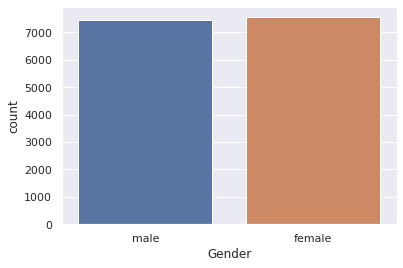

In [ ]:
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


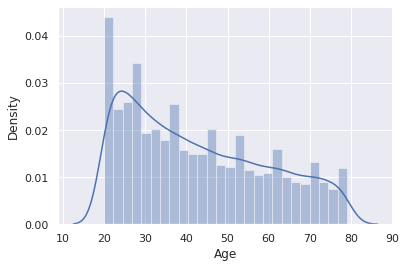

In [ ]:
# Finding the distribution of 'Age' column

sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


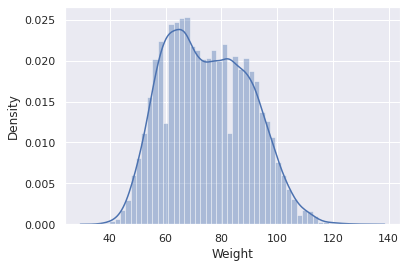

In [ ]:
# Finding the distribution of 'Height' column

sns.distplot(calories_data['Weight'])

In [ ]:
# Finding the correlation

correlation = calories_data.corr()

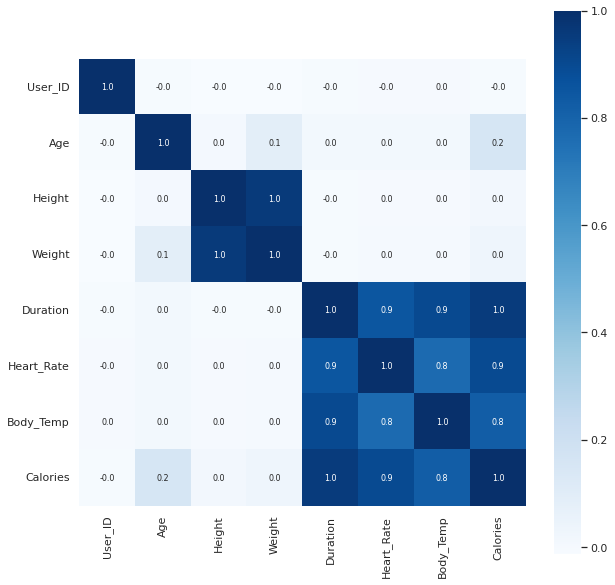

In [ ]:
# Create our heat map

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Converting the text data to numerical values, so we can find the correlation accurately

calories_data.replace({"Gender": {'male':0, 'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Finding the correlation

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


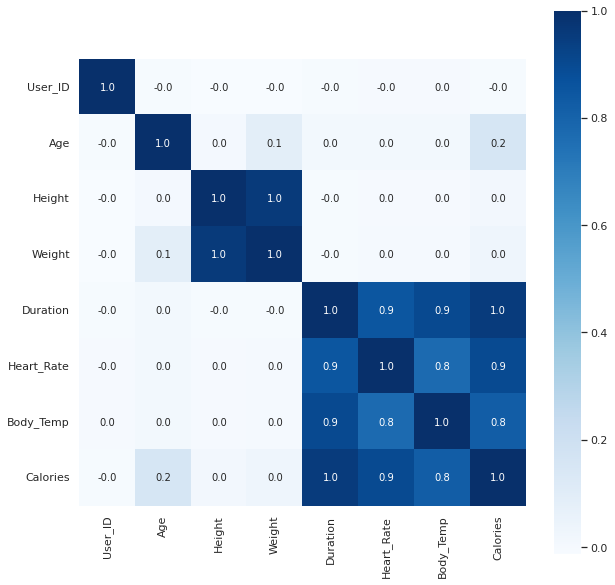

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)

# Y value is equivalent to 'Calories' column
Y = calories_data['Calories']

print(X)


       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
# Splitting the data into training data and test data

# X - all columns (gender, age, height, weight, duration, heart rate, body temp) 
# Y - one column (calories) ---> what we'll find out

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)



In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
# Model training - We'll use XGBoostRegressor

model = XGBRegressor()

In [ ]:
# training the model with X_train

model.fit(X_train, Y_train)

[13:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[142.03304   92.742676  61.72317  ... 165.03683  150.34894  151.95282 ]


In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print(mae)

2.702235557675362


In [ ]:
print(X_train, Y_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
6959        0   51   179.0    76.0      17.0       105.0       40.4
4765        0   68   203.0   102.0      21.0       111.0       40.9
10333       1   42   178.0    75.0      30.0       110.0       40.8
9536        1   25   177.0    76.0      13.0        87.0       40.0
6913        0   35   190.0    92.0      27.0       112.0       40.5
...       ...  ...     ...     ...       ...         ...        ...
6692        0   21   180.0    85.0      14.0        86.0       40.3
5724        1   41   171.0    69.0      15.0        95.0       40.5
4627        0   37   181.0    82.0      26.0       101.0       40.6
11365       0   46   179.0    84.0       1.0        78.0       37.3
14904       0   61   192.0    92.0      24.0       100.0       40.9

[12000 rows x 7 columns] 6959     115.0
4765     190.0
10333    198.0
9536      50.0
6913     200.0
         ...  
6692      37.0
5724      76.0
4627     146.0
11365      3.0
14904   

In [ ]:
print(X_test, Y_test)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
9610        1   27   162.0    56.0      24.0       104.0       40.4
9899        0   36   188.0    92.0      16.0       102.0       40.0
3406        0   23   196.0    96.0      16.0        92.0       40.3
6366        1   38   176.0    73.0       8.0        83.0       39.7
14035       1   59   167.0    66.0      29.0       112.0       41.0
...       ...  ...     ...     ...       ...         ...        ...
4892        1   41   159.0    57.0      17.0        93.0       40.1
14292       1   32   153.0    54.0       8.0        92.0       39.8
10851       0   30   179.0    77.0      26.0       108.0       40.6
642         1   22   161.0    62.0      29.0        99.0       40.8
1220        1   26   164.0    62.0      29.0        99.0       41.1

[3000 rows x 7 columns] 9610     143.0
9899      95.0
3406      62.0
6366      29.0
14035    210.0
         ...  
4892      85.0
14292     38.0
10851    162.0
642      152.0
1220     

In [ ]:
print(Y_test)

9610     143.0
9899      95.0
3406      62.0
6366      29.0
14035    210.0
         ...  
4892      85.0
14292     38.0
10851    162.0
642      152.0
1220     154.0
Name: Calories, Length: 3000, dtype: float64


In [ ]:
print(test_data_prediction)

[142.03304   92.742676  61.72317  ... 165.03683  150.34894  151.95282 ]


In [ ]:
train_data_prediction = model.predict(X_train)
print(train_data_prediction)

[109.731224  190.14932   203.47162   ... 147.47398     3.5591874
 162.29405  ]


In [ ]:
print(Y_train)

6959     115.0
4765     190.0
10333    198.0
9536      50.0
6913     200.0
         ...  
6692      37.0
5724      76.0
4627     146.0
11365      3.0
14904    164.0
Name: Calories, Length: 12000, dtype: float64
